In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [4]:
df = pd.read_csv('..\data\procesed\df_master_clean.csv')
df.head()

,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,tipo_var_rpta_alt,banca,segmento,producto,producto_cons,...,valor_cuota_mes_pago,pago_total,fecha_pago_minima,fecha_pago_maxima,porc_pago,marca_pago_pago,ajustes_banco,vlr_obligacion_log,saldo_capital_log,pago_total_log
0,59412,789567,290775,202312,1,a_uno_tipo_1,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,...,443837.0,0.0,20231128.0,20231206.0,0.0,FACTURACION_MES_SGTE,NO,16.105743,16.061718,0.000000
1,277595,1045909,34433,202312,1,b_uno_tipo_2,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,...,5122226.0,0.0,20231128.0,20231206.0,0.0,NO_PAGO,NO,18.191116,18.134920,0.000000
2,487939,390004,689862,202312,0,e_cero_tipo_2,Banca Personas,Personal,TARJETA DE CREDITO,Tarjeta de Credito,...,1696087.0,900000.0,20231128.0,20231128.0,53.0,PAGO_MENOS,NO,16.050733,15.947464,13.710151
3,464338,811845,268497,202312,0,e_cero_tipo_2,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,...,310842.0,0.0,20231128.0,20231206.0,0.0,NO_PAGO,NO,16.255075,16.169922,0.000000
4,147234,366139,713712,202312,0,e_cero_tipo_2,Banca Personas,Personal,TARJETA DE CREDITO,Tarjeta de Credito,...,524806.0,0.0,20231128.0,20231206.0,0.0,PAGO_MENOS,NO,14.770119,14.667203,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100466 entries, 0 to 100465
Data columns (total 68 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   nit_enmascarado                  100466 non-null  int64  
 1   num_oblig_orig_enmascarado       100466 non-null  int64  
 2   num_oblig_enmascarado            100466 non-null  int64  
 3   fecha_var_rpta_alt               100466 non-null  int64  
 4   var_rpta_alt                     100466 non-null  int64  
 5   tipo_var_rpta_alt                100466 non-null  object 
 6   banca                            100466 non-null  object 
 7   segmento                         100466 non-null  object 
 8   producto                         100466 non-null  object 
 9   producto_cons                    100466 non-null  object 
 10  aplicativo                       100466 non-null  object 
 11  min_mora                         100466 non-null  int64  
 12  ma

# Variable objetivo

In [6]:
df['var_rpta_alt'].value_counts()

var_rpta_alt
0    53425
1    47041
Name: count, dtype: int64

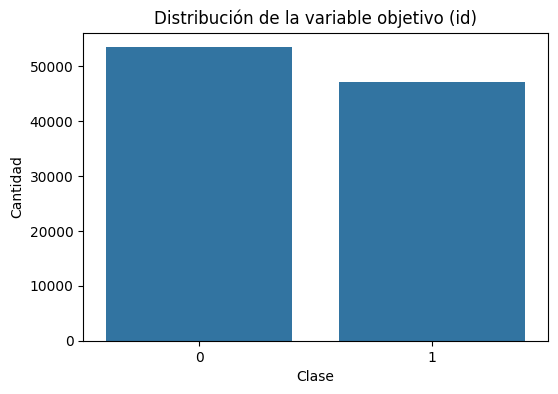

Proporciones por clase:
var_rpta_alt
0    0.531772
1    0.468228
Name: proportion, dtype: float64


In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='var_rpta_alt', data=df)
plt.title('Distribución de la variable objetivo (id)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

# Ver proporciones
proporciones = df['var_rpta_alt'].value_counts(normalize=True)
print("Proporciones por clase:")
print(proporciones)

## Analisis bivariado

In [8]:
from scipy.stats import chi2_contingency



🔹 Variable: banca
Cardinalidad: 3
Frecuencias:
banca
Banca Personas    86425
Independientes    10479
Banca Pyme         3562
Name: count, dtype: int64


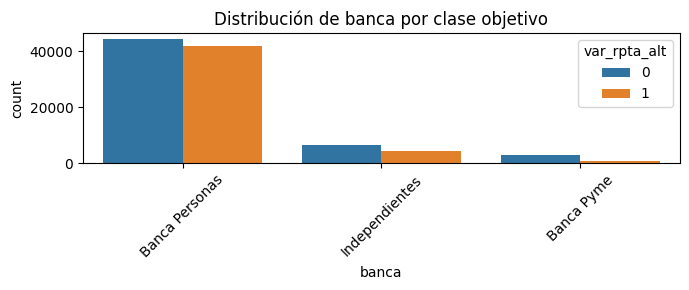

📊 Test Chi-cuadrado:
  Chi²: 1146.74
  p-valor: 0.0000
  ❗ Asociación significativa con la variable objetivo.
##################################################


##################################################

🔹 Variable: rango_mora
Cardinalidad: 2
Frecuencias:
rango_mora
a.1-30     60605
b.31-90    39861
Name: count, dtype: int64


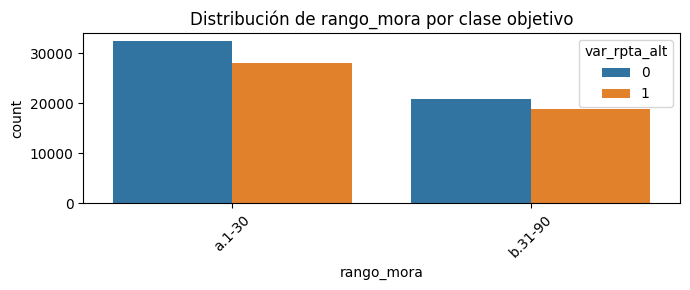

📊 Test Chi-cuadrado:
  Chi²: 13.14
  p-valor: 0.0003
  ❗ Asociación significativa con la variable objetivo.
##################################################


##################################################

🔹 Variable: alternativa_aplicada_agr
Cardinalidad: 7
Frecuencias:
alternativa_aplicada_agr
SIN_INFO             65504
CONSOLIDACION        14412
AMPLIACION           11912
PRORROGA              5425
COMBO                 2578
CONDONACION            517
PERIODO DE GRACIA      118
Name: count, dtype: int64


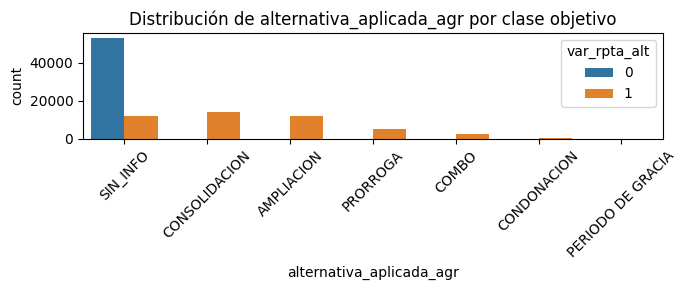

📊 Test Chi-cuadrado:
  Chi²: 59287.76
  p-valor: 0.0000
  ❗ Asociación significativa con la variable objetivo.
##################################################


##################################################

🔹 Variable: cant_promesas_cumplidas_binario
Cardinalidad: 2
Frecuencias:
cant_promesas_cumplidas_binario
0    91925
1     8541
Name: count, dtype: int64


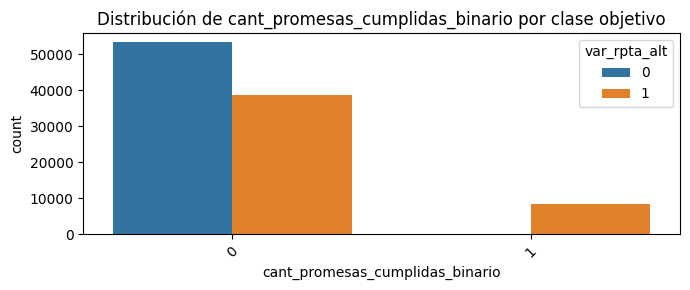

📊 Test Chi-cuadrado:
  Chi²: 9905.92
  p-valor: 0.0000
  ❗ Asociación significativa con la variable objetivo.
##################################################


##################################################

🔹 Variable: cant_gestiones_binario
Cardinalidad: 2
Frecuencias:
cant_gestiones_binario
1    96871
0     3595
Name: count, dtype: int64


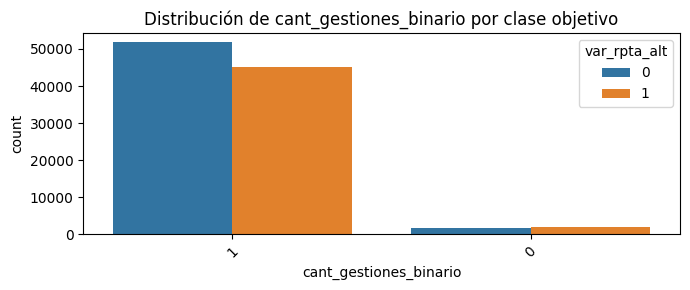

📊 Test Chi-cuadrado:
  Chi²: 64.11
  p-valor: 0.0000
  ❗ Asociación significativa con la variable objetivo.
##################################################


##################################################

🔹 Variable: segmento
Cardinalidad: 6
Frecuencias:
segmento
Personal         63571
Personal plus    19287
Micropyme        10479
Pymes             3562
Social            3014
Preferencial       553
Name: count, dtype: int64


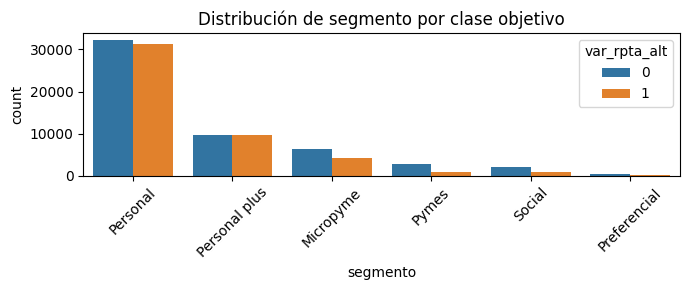

📊 Test Chi-cuadrado:
  Chi²: 1567.76
  p-valor: 0.0000
  ❗ Asociación significativa con la variable objetivo.
##################################################


##################################################

🔹 Variable: marca_alternativa
Cardinalidad: 3
Frecuencias:
marca_alternativa
SIN_INFO                 52702
Acepta Alternativa       44197
No Acepta Alternativa     3567
Name: count, dtype: int64


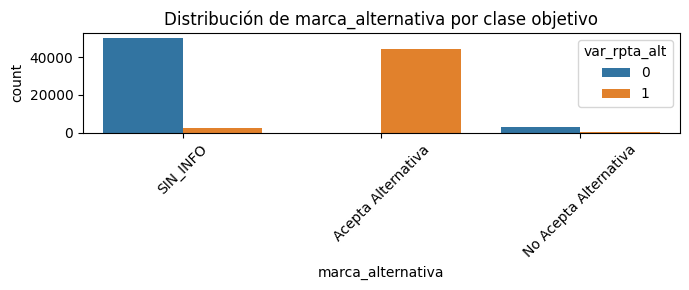

📊 Test Chi-cuadrado:
  Chi²: 89684.07
  p-valor: 0.0000
  ❗ Asociación significativa con la variable objetivo.
##################################################


##################################################


In [10]:
key_cat_vars = [
    'banca',
    'rango_mora',
    'alternativa_aplicada_agr',
    'cant_promesas_cumplidas_binario',
    'cant_gestiones_binario',
    'segmento',
    'marca_alternativa']

# Loop de análisis
for col in key_cat_vars:
    print(f"\n🔹 Variable: {col}")
    print(f"Cardinalidad: {df[col].nunique()}")
    print("Frecuencias:")
    print(df[col].value_counts())

    # Visualización
    plt.figure(figsize=(7, 3))
    sns.countplot(data=df, x=col, hue='var_rpta_alt', order=df[col].value_counts().index)
    plt.title(f'Distribución de {col} por clase objetivo')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Prueba Chi-cuadrado
    tabla = pd.crosstab(df[col], df['var_rpta_alt'])
    chi2, p, dof, expected = chi2_contingency(tabla)

    print(f"📊 Test Chi-cuadrado:")
    print(f"  Chi²: {chi2:.2f}")
    print(f"  p-valor: {p:.4f}")
    if p < 0.05:
        print("  ❗ Asociación significativa con la variable objetivo.")
    else:
        print("  ✅ No se detecta asociación significativa.")
    print("#" * 50)
    print("\n")
    print("#" * 50)

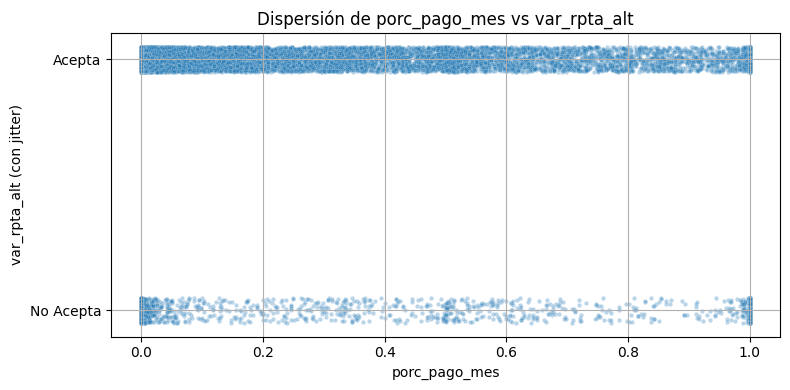

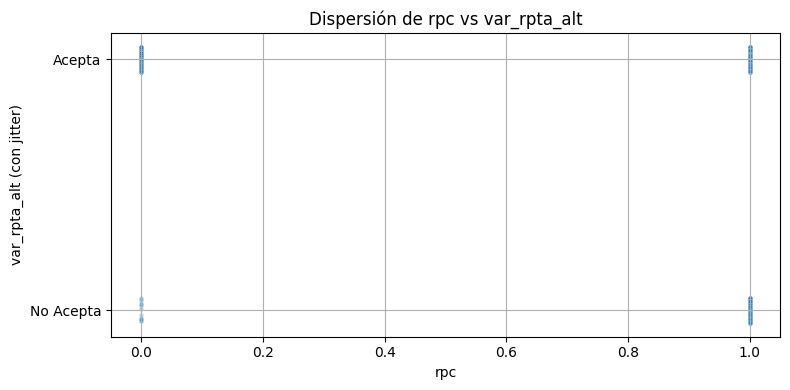

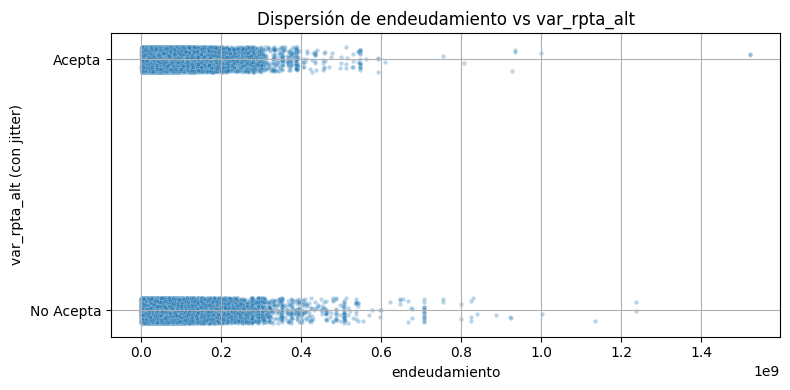

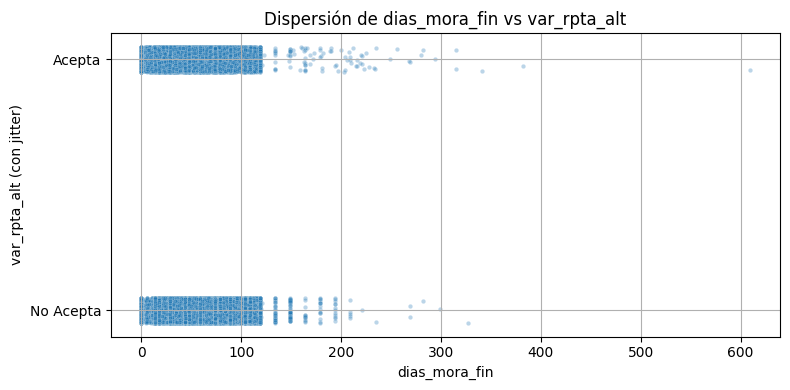

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variables numéricas seleccionadas
num_vars = ['porc_pago_mes', 'rpc', 'endeudamiento', 'dias_mora_fin']

# Crear columna auxiliar para jitter en var_rpta_alt
df['var_rpta_alt_jitter'] = df['var_rpta_alt'] + np.random.uniform(-0.05, 0.05, size=len(df))

# Graficar scatterplots
for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(
        data=df,
        x=col,
        y='var_rpta_alt_jitter',
        alpha=0.3,
        s=10
    )
    plt.title(f'Dispersión de {col} vs var_rpta_alt')
    plt.xlabel(col)
    plt.ylabel('var_rpta_alt (con jitter)')
    plt.yticks([0, 1], ['No Acepta', 'Acepta'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Analisis multivariado

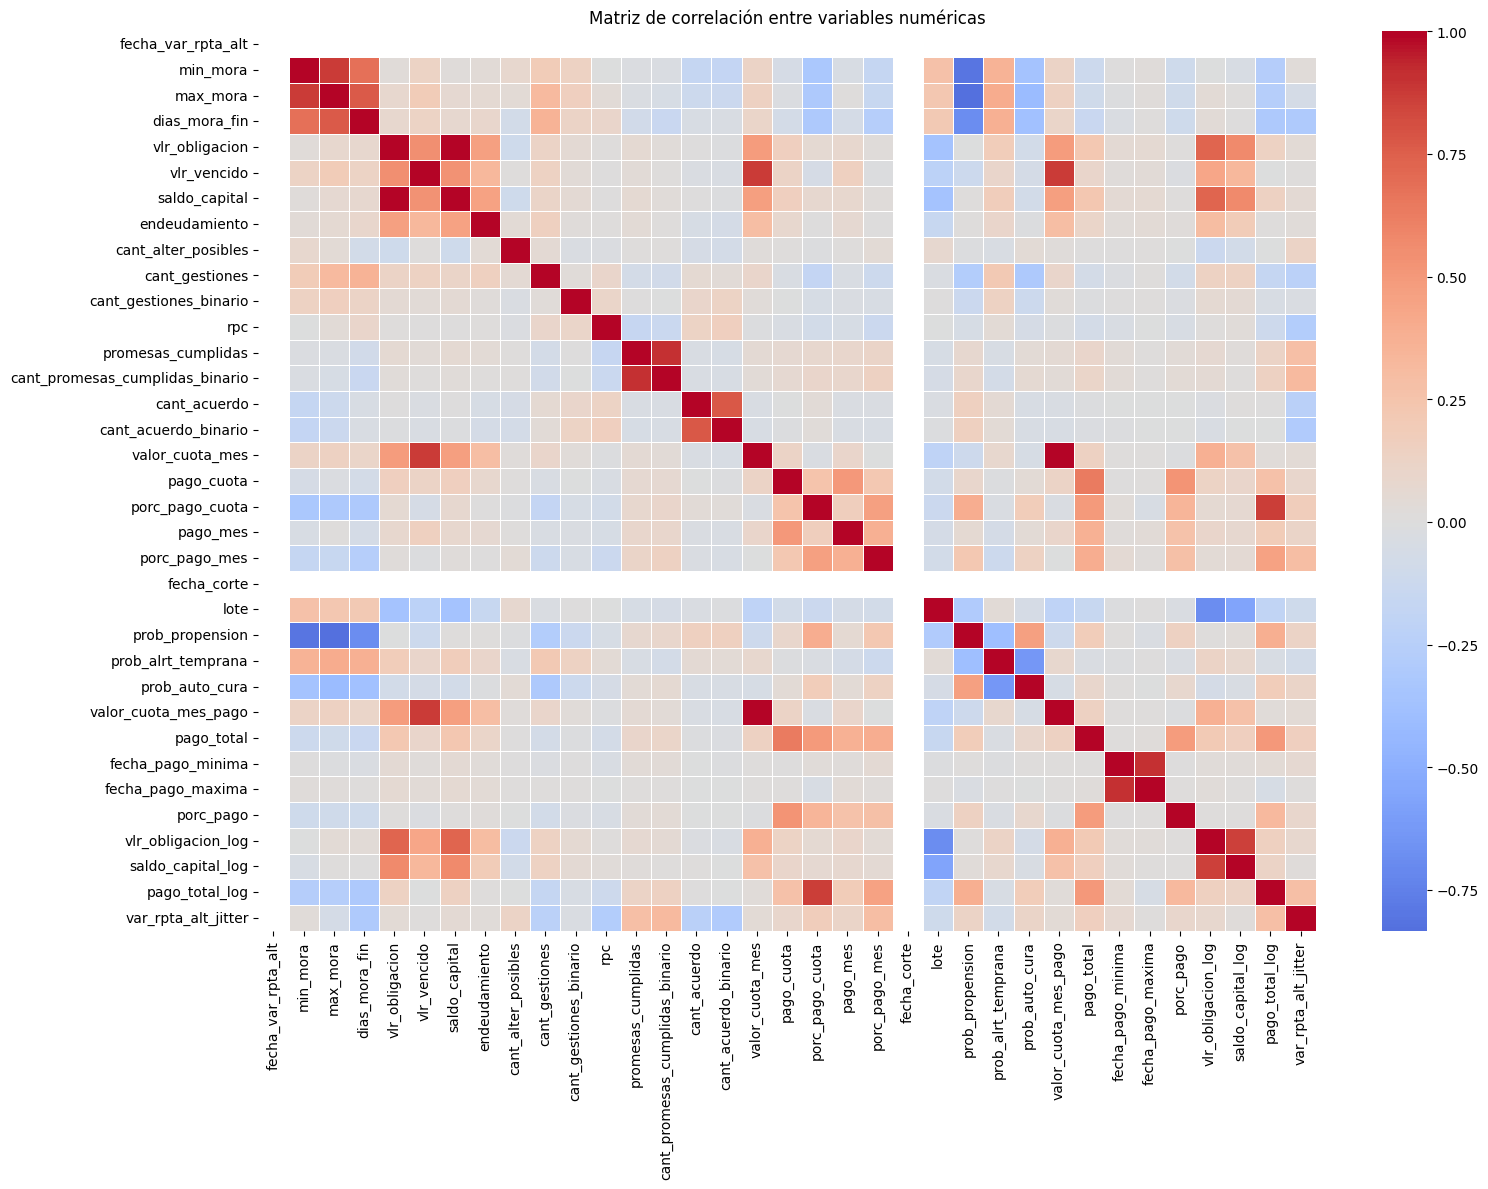

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo columnas numéricas útiles
exclude_cols = ['nit_enmascarado', 'num_oblig_orig_enmascarado', 'num_oblig_enmascarado', 'var_rpta_alt']
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = [col for col in num_cols if col not in exclude_cols]

# Calcular matriz de correlación
corr_matrix = df[num_cols].corr()

# Mapa de calor
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, center=0, linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()


In [13]:
# Calcular matriz de correlación
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Filtrar correlaciones significativas (excluyendo 1)
threshold = 0.7
correlacion_alta = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)]

# Convertir a formato largo (long format)
correlaciones_significativas = correlacion_alta.stack().reset_index()
correlaciones_significativas.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Eliminar duplicados (por simetría)
correlaciones_significativas = correlaciones_significativas[correlaciones_significativas['Variable 1'] < correlaciones_significativas['Variable 2']]

# Ordenar de mayor a menor
correlaciones_significativas = correlaciones_significativas.sort_values(by='Correlación', ascending=False)

# Mostrar resultado
correlaciones_significativas.head(20)  # o usa display() si estás en Jupyter


,Variable 1,Variable 2,Correlación
20,valor_cuota_mes,valor_cuota_mes_pago,0.999977
2,var_rpta_alt,var_rpta_alt_jitter,0.998328
13,saldo_capital,vlr_obligacion,0.997203
16,cant_promesas_cumplidas_binario,promesas_cumplidas,0.907031
27,fecha_pago_maxima,fecha_pago_minima,0.902347
5,max_mora,min_mora,0.877690
19,valor_cuota_mes,vlr_vencido,0.873437
24,valor_cuota_mes_pago,vlr_vencido,0.873433
32,pago_total_log,porc_pago_cuota,0.869834
31,saldo_capital_log,vlr_obligacion_log,0.858447
